Dataset : US census adult income

Objective : Make a model for predicting income bracket using Logistic regression and SVM

# II. Import Libraries

In [1]:
# !pip install category_encoders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

import joblib
import json

# III. Data loading

In [3]:
raw_data = pd.read_csv('h8dsft_P1G2_Samuel_Naiborhu.csv')
raw_data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [4]:
raw_data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [5]:
raw_data.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
29860,51,Self-emp-not-inc,10th,6,Widowed,Transport-moving,Other-relative,White,Female,0,0,40,United-States,<=50K
29861,31,Local-gov,10th,6,Never-married,Transport-moving,Other-relative,White,Male,0,1741,40,United-States,<=50K
29862,17,Private,10th,6,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,10,El-Salvador,<=50K
29863,17,Private,10th,6,Never-married,Other-service,Other-relative,White,Male,0,0,40,Mexico,<=50K
29864,31,Private,10th,6,Divorced,Sales,Other-relative,White,Female,0,0,40,United-States,<=50K


# IV. Exploratory Data Analysis (EDA)

In [6]:
raw_data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,29865.000000,29865.000000,29865.000000,29865.000000,29865.000000
mean,38.587209,10.161694,1130.355667,89.879357,41.045170
std,13.071591,2.554327,7595.088674,407.501935,12.000165
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


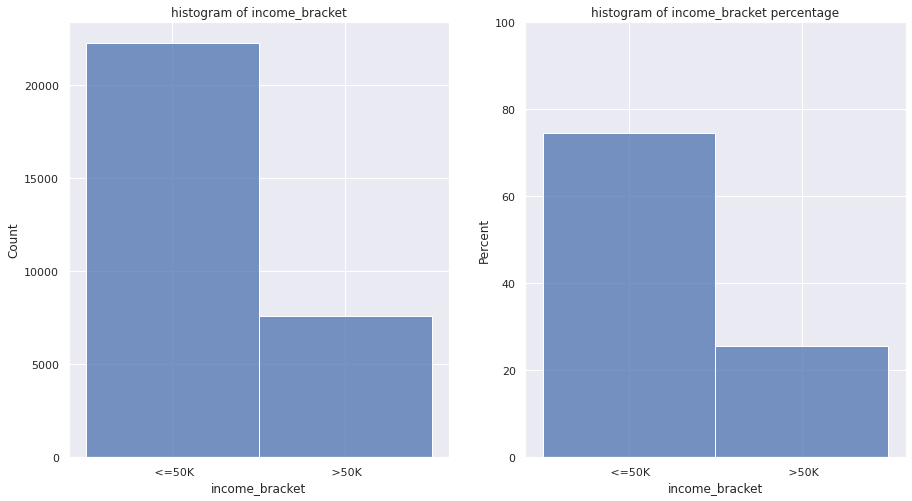

In [7]:
# Create plots

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.histplot(raw_data['income_bracket'])
plt.title('histogram of income_bracket')

plt.subplot(1,2,2)
sns.histplot(raw_data['income_bracket'], stat='percent')
plt.ylim(top=100)
plt.title('histogram of income_bracket percentage')

plt.show()


People with income lower than \$ 50,000 is more than thrice the size of people with income higher than \$ 50,000.

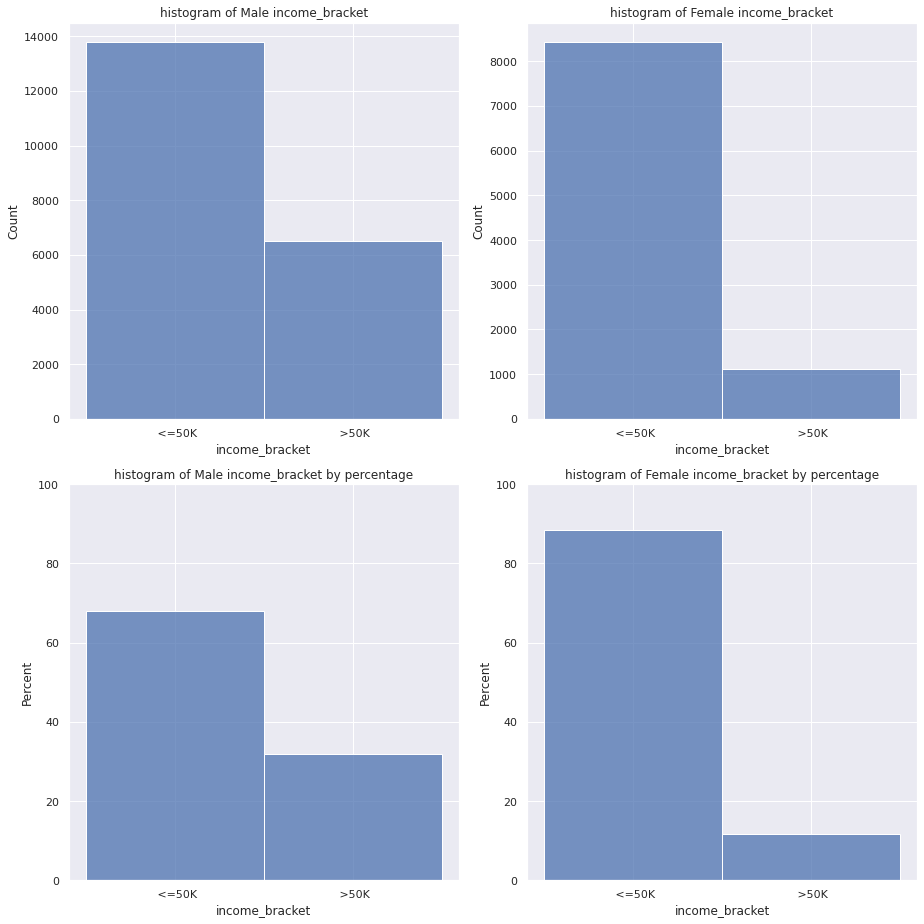

In [8]:
# Create plots

plt.figure(figsize=(13, 13))

plt.subplot(2,2,1)
sns.histplot(raw_data[raw_data['sex'] == ' Male']['income_bracket'].sort_values())
plt.title('histogram of Male income_bracket')

plt.subplot(2,2,2)
sns.histplot(raw_data[raw_data['sex'] == ' Female']['income_bracket'].sort_values())
plt.title('histogram of Female income_bracket')

plt.subplot(2,2,3)
sns.histplot(raw_data[raw_data['sex'] == ' Male']['income_bracket'].sort_values(), stat='percent')
plt.ylim(top=100)
plt.title('histogram of Male income_bracket by percentage')

plt.subplot(2,2,4)
sns.histplot(raw_data[raw_data['sex'] == ' Female']['income_bracket'].sort_values(), stat='percent')
plt.ylim(top=100)
plt.title('histogram of Female income_bracket by percentage')


plt.tight_layout()
plt.show()


The percentage of men who earn more than \$ 50,000 is larger than the percentage of women who earn more than \$ 50,000.
On the other hand, the percentage of men who earn less than \$ 50,000 is smaller than the percentage of women who earn less than \$ 50,000.

In [9]:
raw_data['race'].value_counts()

 White                 25699
 Black                  2765
 Asian-Pac-Islander      901
 Amer-Indian-Eskimo      276
 Other                   224
Name: race, dtype: int64

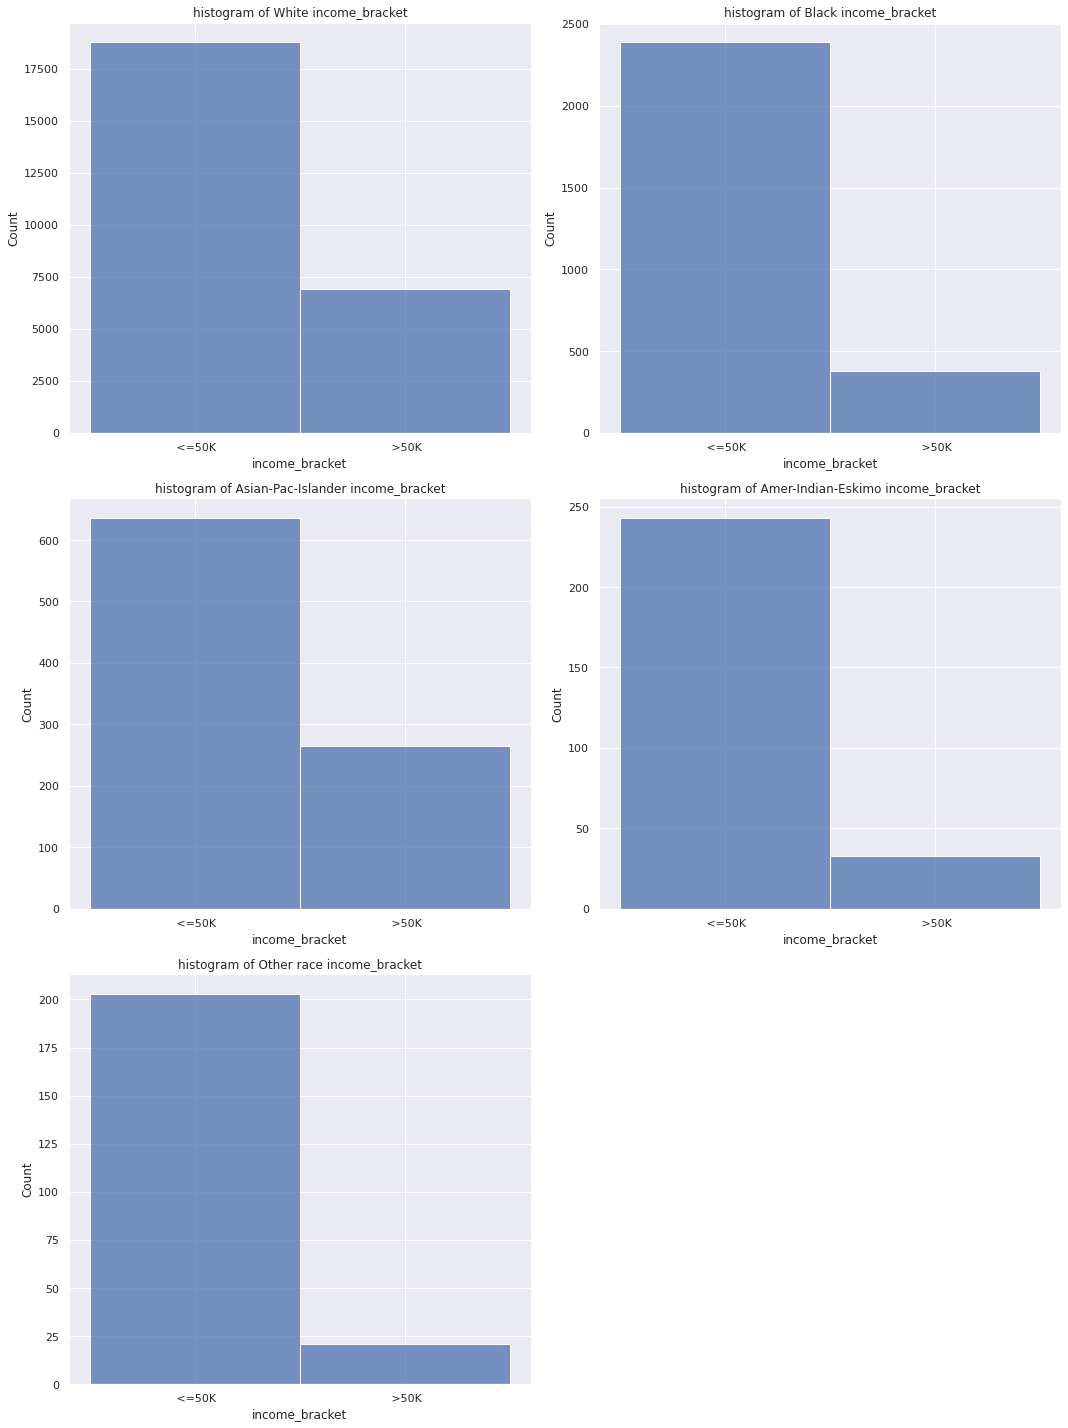

In [10]:
# Create plots

plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.histplot(raw_data[raw_data['race'] == ' White']['income_bracket'].sort_values())
plt.title('histogram of White income_bracket')

plt.subplot(3,2,2)
sns.histplot(raw_data[raw_data['race'] == ' Black']['income_bracket'])
plt.title('histogram of Black income_bracket')

plt.subplot(3,2,3)
sns.histplot(raw_data[raw_data['race'] == ' Asian-Pac-Islander']['income_bracket'].sort_values())
plt.title('histogram of Asian-Pac-Islander income_bracket')

plt.subplot(3,2,4)
sns.histplot(raw_data[raw_data['race'] == ' Amer-Indian-Eskimo']['income_bracket'])
plt.title('histogram of Amer-Indian-Eskimo income_bracket')

plt.subplot(3,2,5)
sns.histplot(raw_data[raw_data['race'] == ' Other']['income_bracket'])
plt.title('histogram of Other race income_bracket')

plt.tight_layout()
plt.show()

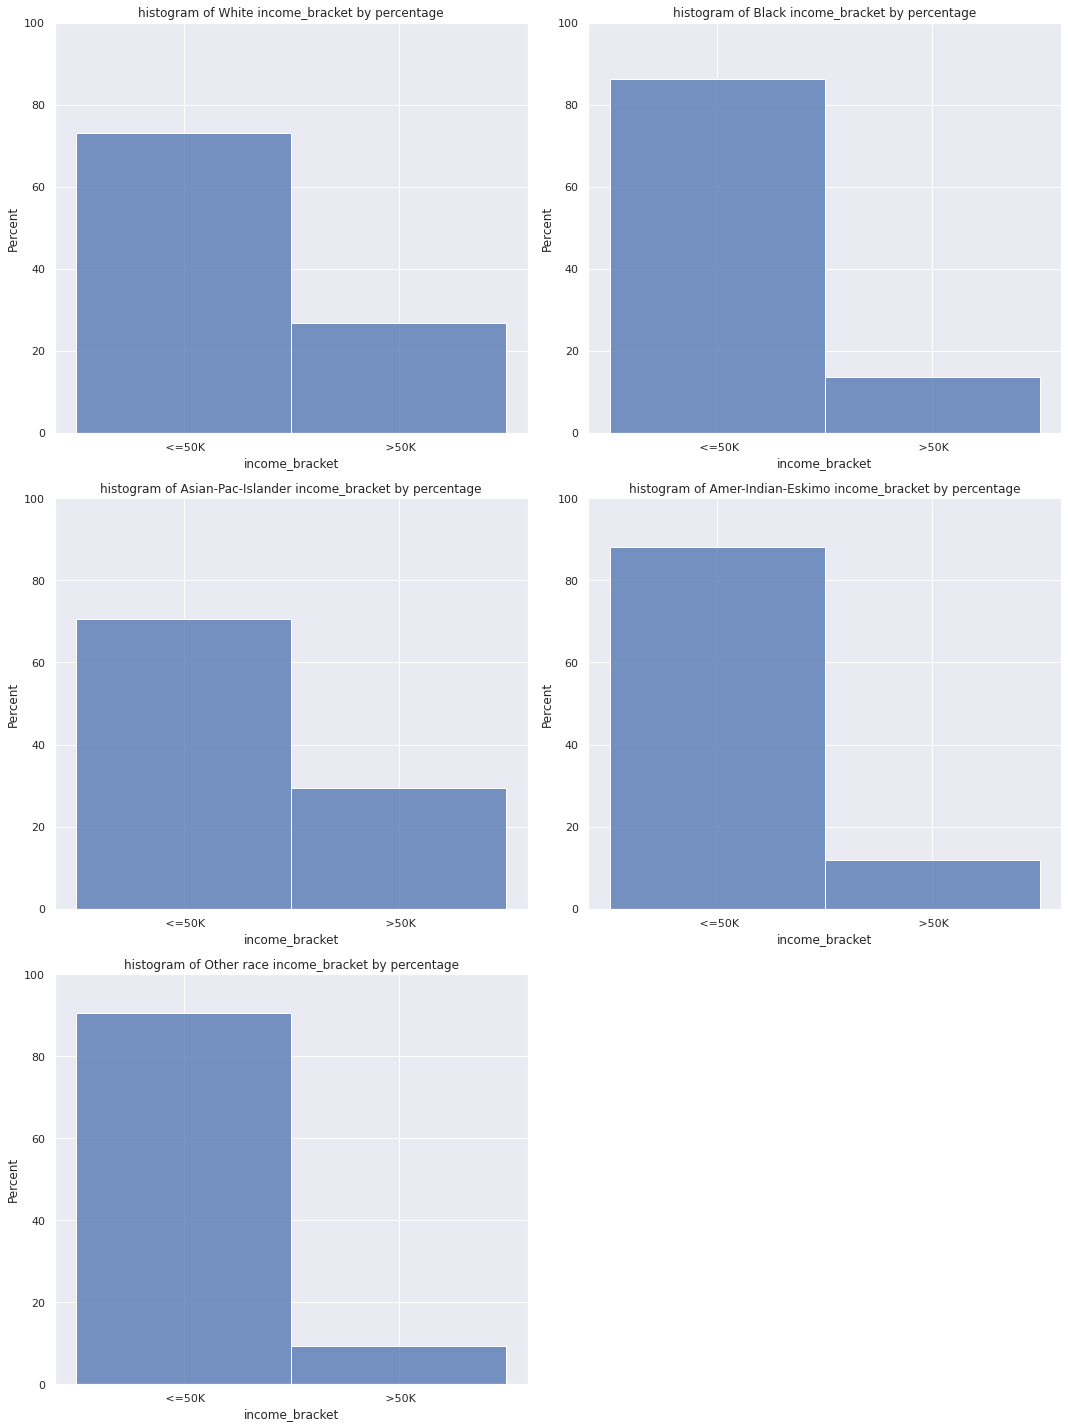

In [11]:
# Create plots

plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.histplot(raw_data[raw_data['race'] == ' White']['income_bracket'].sort_values(), stat='percent')
plt.ylim(top=100)
plt.title('histogram of White income_bracket by percentage')

plt.subplot(3,2,2)
sns.histplot(raw_data[raw_data['race'] == ' Black']['income_bracket'], stat='percent')
plt.ylim(top=100)
plt.title('histogram of Black income_bracket by percentage')

plt.subplot(3,2,3)
sns.histplot(raw_data[raw_data['race'] == ' Asian-Pac-Islander']['income_bracket'].sort_values(), stat='percent')
plt.ylim(top=100)
plt.title('histogram of Asian-Pac-Islander income_bracket by percentage')

plt.subplot(3,2,4)
sns.histplot(raw_data[raw_data['race'] == ' Amer-Indian-Eskimo']['income_bracket'], stat='percent')
plt.ylim(top=100)
plt.title('histogram of Amer-Indian-Eskimo income_bracket by percentage')

plt.subplot(3,2,5)
sns.histplot(raw_data[raw_data['race'] == ' Other']['income_bracket'], stat='percent')
plt.ylim(top=100)
plt.title('histogram of Other race income_bracket by percentage')

plt.tight_layout()
plt.show()

Asian-pac-islander has the largest percentage of people earning higher than \$ 50,000 , slightly larger than white people. 'Other' race has the highest percentage of people earning lower than \$ 50,000.

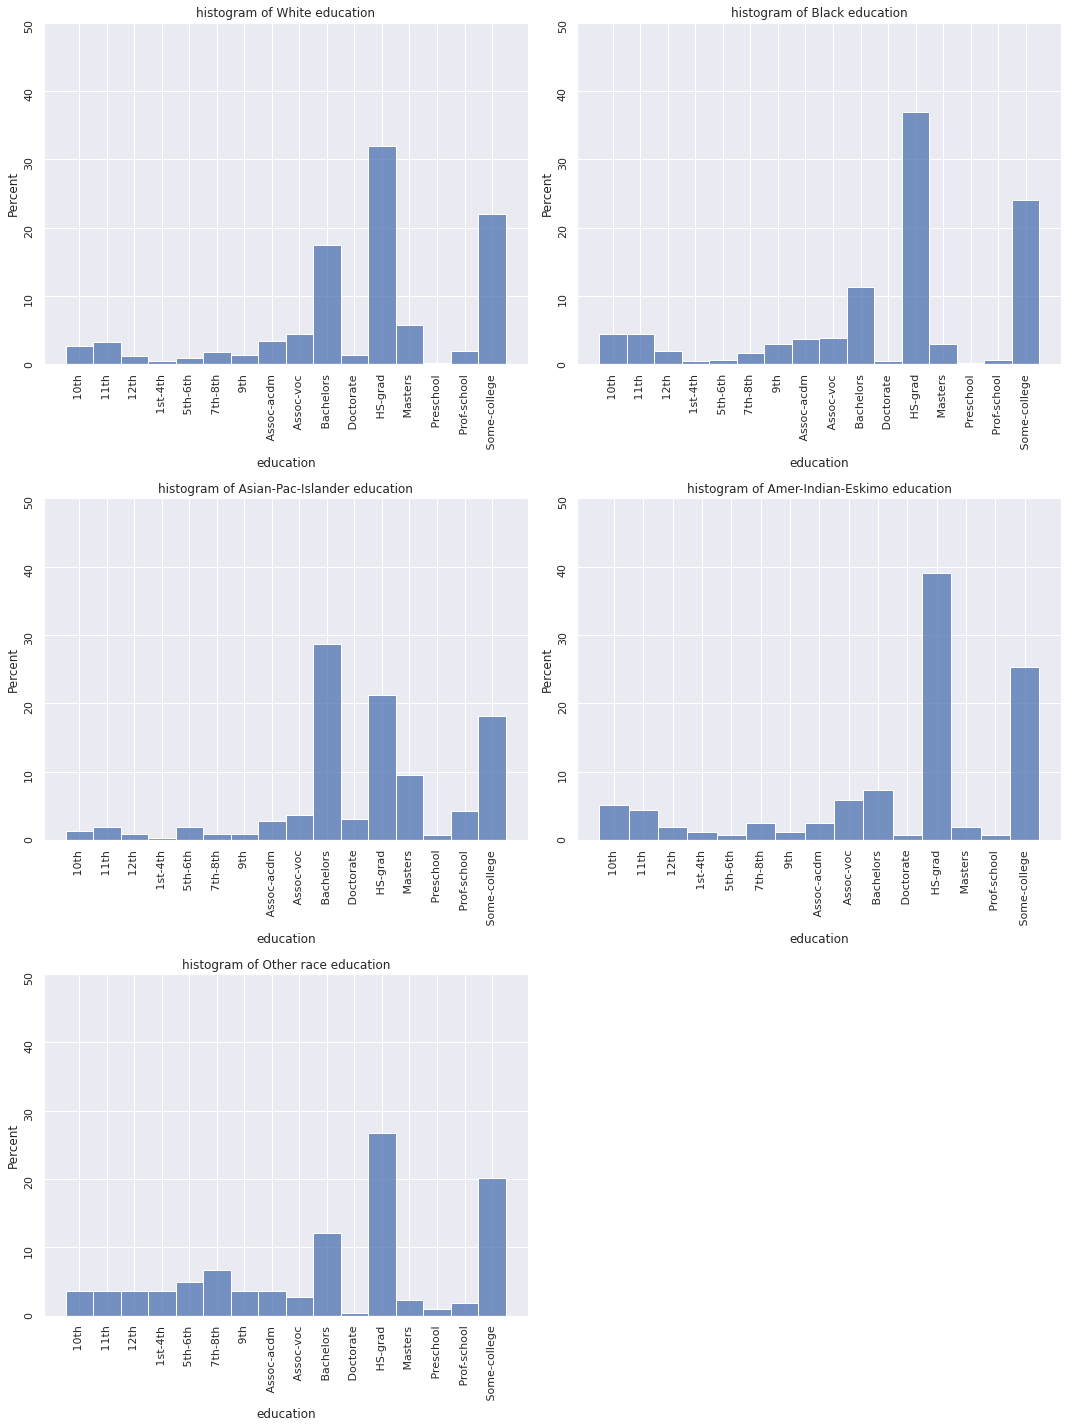

In [12]:
# Create plots

plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.histplot(raw_data[raw_data['race'] == ' White']['education'].sort_values(), stat='percent')
plt.ylim(top=50)
plt.tick_params(labelrotation=90)
plt.title('histogram of White education')

plt.subplot(3,2,2)
sns.histplot(raw_data[raw_data['race'] == ' Black']['education'].sort_values(), stat='percent')
plt.ylim(top=50)
plt.tick_params(labelrotation=90)
plt.title('histogram of Black education')

plt.subplot(3,2,3)
sns.histplot(raw_data[raw_data['race'] == ' Asian-Pac-Islander']['education'].sort_values(), stat='percent')
plt.ylim(top=50)
plt.tick_params(labelrotation=90)
plt.title('histogram of Asian-Pac-Islander education')

plt.subplot(3,2,4)
sns.histplot(raw_data[raw_data['race'] == ' Amer-Indian-Eskimo']['education'].sort_values(), stat='percent')
plt.ylim(top=50)
plt.tick_params(labelrotation=90)
plt.title('histogram of Amer-Indian-Eskimo education')

plt.subplot(3,2,5)
sns.histplot(raw_data[raw_data['race'] == ' Other']['education'].sort_values(), stat='percent')
plt.ylim(top=50)
plt.tick_params(labelrotation=90)
plt.title('histogram of Other race education')

plt.tight_layout()
plt.show()

Asian-pac-islander is the most educated ethnic group, followed by whites. Asian-pac-islander also has the highest rate of masters and doctorates. While amer-indian-eskimos is the least educated group. These educations chart might explain why asian-pac-islander has the most counts for income above \$ 50,000. Education is the leading predictor for income attainment.

# V. Data preprocessing

## V.I. define dataframe for inferencing

In [13]:
inf_count =  round(raw_data.shape[0]*0.03)
inf_count

896

In [14]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
25225,37,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K
19233,30,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
12648,31,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K
9452,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
12535,36,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [15]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 29865
new data size: 28969


## V.II. Split train test dataset

In [16]:
# define features variable as X
X = raw_data_1.drop('income_bracket', axis=1)

In [17]:
# define target variable as y
y = raw_data_1['income_bracket']
y.head()

0     <=50K
1      >50K
2      >50K
3     <=50K
4     <=50K
Name: income_bracket, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=33, stratify=X['occupation'])

print(f'Train size: {X_train.shape[0]}')
print(f'Test size: {X_test.shape[0]}')

Train size: 23175
Test size: 5794


In [19]:
X_train.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
19742,39,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
8352,51,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
16239,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States
21814,25,Private,Some-college,10,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,22,United-States
11592,50,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States


### V.III. Handling empty values

In [20]:
# sum null value
X_train.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

there is no empty value

### V.IV. Handling Outlier

In [21]:
X_train.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
19742,39,Private,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
8352,51,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
16239,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States
21814,25,Private,Some-college,10,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,22,United-States
11592,50,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States


In [22]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()


In [23]:
# make boundary for normally distributed data
def normally_boundary(features):
    upper_boundary=features.mean()+3*features.std()
    lower_boundary=features.mean()-3*features.std()
    return lower_boundary, upper_boundary

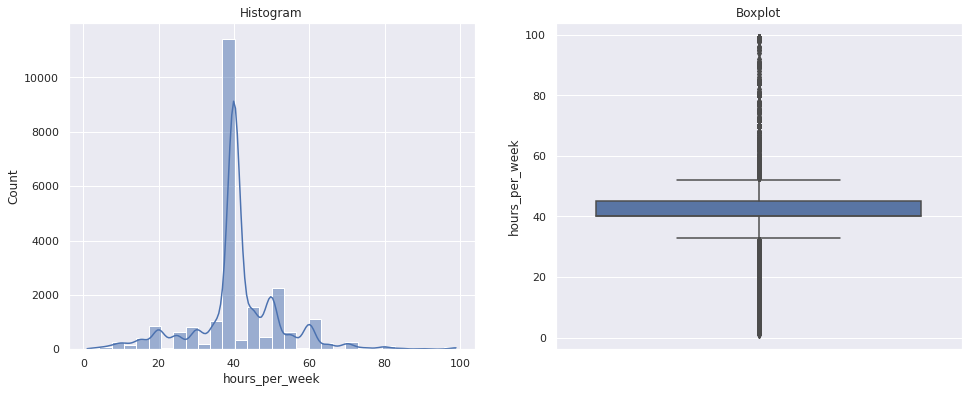

In [24]:
# plotting for hours_per_week
outlier_plot(X_train['hours_per_week'])

In [25]:
# check skewness on hours_per_week feature
X_train['hours_per_week'].skew()

0.31908931658618217

the skewness is less than 0.5, hours_per_week feature is lightly skewed to the right, this feature can be considered normally distributed.

In [26]:
# boundary from hours_per_week feature
workhours_lower_bound, workhours_upper_bound =  normally_boundary(X_train['hours_per_week'])
print(f'Lower bound: {workhours_lower_bound}')
print(f'Upper bound: {workhours_upper_bound}')

Lower bound: 4.935263849313827
Upper bound: 77.09468221325359


the lower bound of feature is 4.986 hours, and the upper bound of feature is 77.089 hours.
so we want to cap the value lower than the lower bound and higher than the upper bound.

In [27]:
X_train.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000
mean,38.626365,10.172772,1134.377605,88.994563,41.014973
std,13.085293,2.544743,7732.286341,404.339631,12.026570
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000


In [28]:
# capping outlier from education_num feature
X_train_1 = X_train.copy()
X_train_1.loc[X_train_1['hours_per_week'] <= workhours_lower_bound, 'hours_per_week'] = workhours_lower_bound
X_train_1.loc[X_train_1['hours_per_week'] >= workhours_upper_bound, 'hours_per_week'] = workhours_upper_bound

In [29]:
# describe new data 
X_train_1.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000
mean,38.626365,10.172772,1134.377605,88.994563,40.909637
std,13.085293,2.544743,7732.286341,404.339631,11.600585
min,17.000000,1.000000,0.000000,0.000000,4.935264
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,77.094682


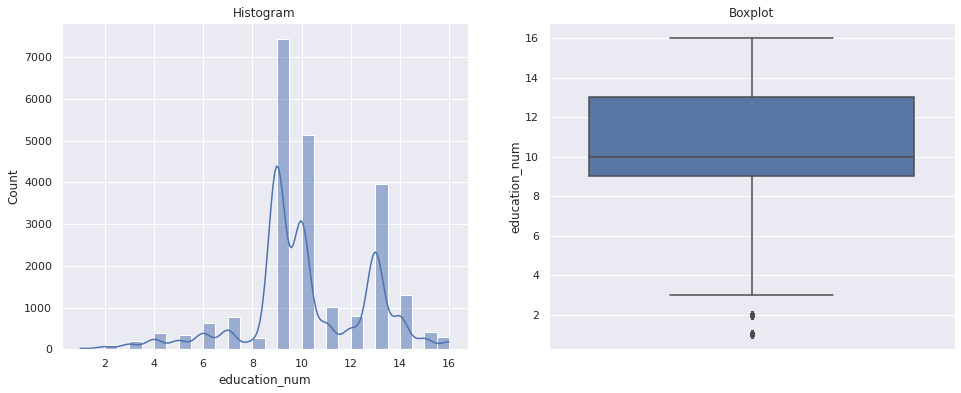

In [30]:
# plotting for education_num
outlier_plot(X_train['education_num'])

In [31]:
# check skewness on education_num feature
X_train['education_num'].skew()

-0.30034264992620135

the skewness is more than -0.5, education_num feature is lightly skewed to the left, this feature can be considered normally distributed.

In [32]:
# boundary from education_num feature
education_lower_bound, education_upper_bound =  normally_boundary(X_train['education_num'])
print(f'Lower bound: {education_lower_bound}')
print(f'Upper bound: {education_upper_bound}')

Lower bound: 2.538544526147133
Upper bound: 17.807000241921905


the feature of 'education_num' is actually a label encoded categorical variable from 'education'.
the lower bound of feature is 2.554 (lower than 5th-6th year of elementary), and the upper bound of feature is 17.771 (higher than Doctorate, which dont exist, we can ignore this).
so we want to cap the value lower than the lower bound and higher than the upper bound.

In [33]:
# capping outlier from education_num feature
X_train_2 = X_train_1.copy()
X_train_2.loc[X_train_2['education_num'] <= education_lower_bound, 'education_num'] = education_lower_bound

In [34]:
# describe new data 
X_train_2['education_num'].describe()

count    23175.000000
mean        10.177539
std          2.529443
min          2.538545
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education_num, dtype: float64

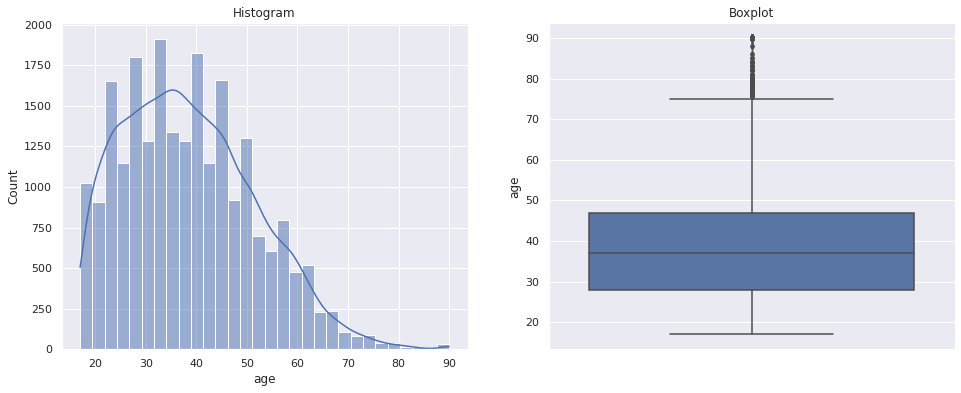

In [35]:
# plotting for education_num
outlier_plot(X_train['age'])

In [36]:
# check skewness on age feature
X_train['age'].skew()

0.5266934296666314

the skewness is more than 0.5, age feature is moderately skewed to the right, this feature not normally distributed.

In [37]:
# define IQR
IQR= X_train['age'].quantile(0.75) - X_train['age'].quantile(0.25)
IQR

19.0

In [38]:
## Calculating the boundaries age
lower_boundery_age= X_train['age'].quantile(0.25)-(IQR*1.5)
upper_boundery_age= X_train['age'].quantile(0.75)+(IQR*1.5)
print(lower_boundery_age)
print(upper_boundery_age)

-0.5
75.5


the lower bound of feature is -0.5 years old (we can ignore this), and the upper bound of feature is 75.5 years old.
so we want to cap the value lower than the lower bound and higher than the upper bound.

In [39]:
# capping outlier from education_num feature
X_train_3 = X_train_2.copy()
X_train_3.loc[X_train_3['age'] >= upper_boundery_age, 'age'] = upper_boundery_age

In [40]:
X_train_3['age'].describe()

count    23175.000000
mean        38.591219
std         12.971728
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         75.500000
Name: age, dtype: float64

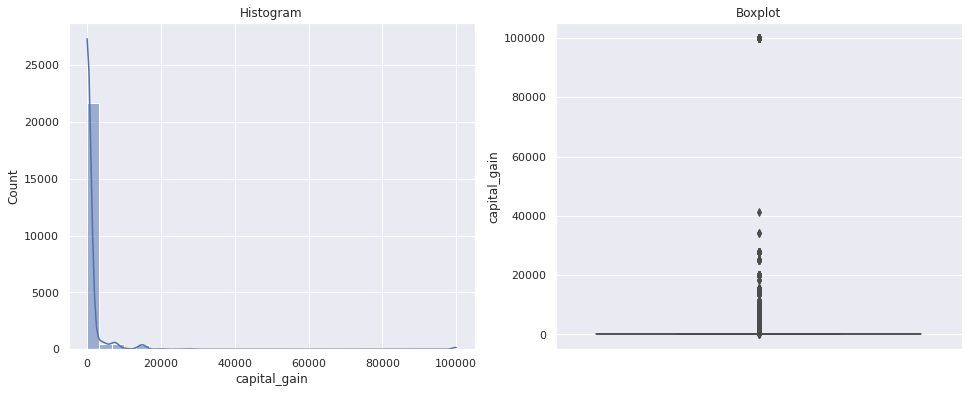

In [41]:
outlier_plot(X_train['capital_gain'])

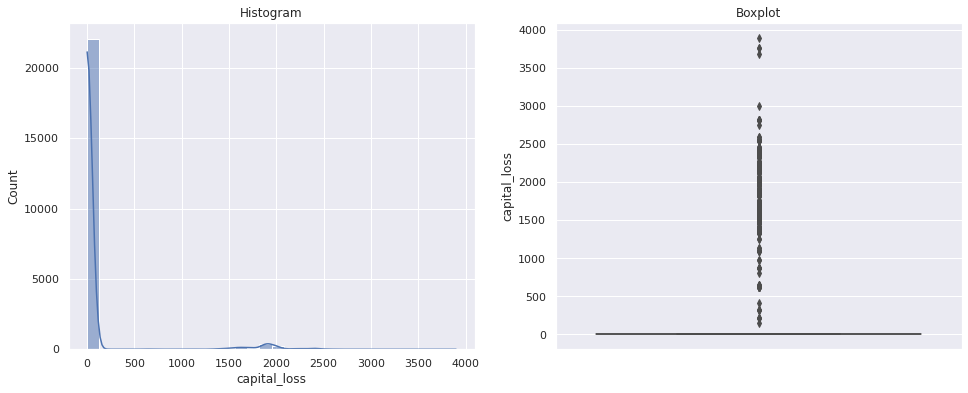

In [42]:
outlier_plot(X_train['capital_loss'])

from the chart of capital gain and loss, we can see that only a few people did some investing, all of them are outliers, and they will Significantly Affect the training model from their large number. we might want to drop the features.

*update: after several trials, these 2 features actually is quite good predictors for > $50000 income bracket. we're not dropping these.

### V.V. Features selection

In [43]:
# find corelation between features
X_train_cor = X_train_3.corr() 

<AxesSubplot:>

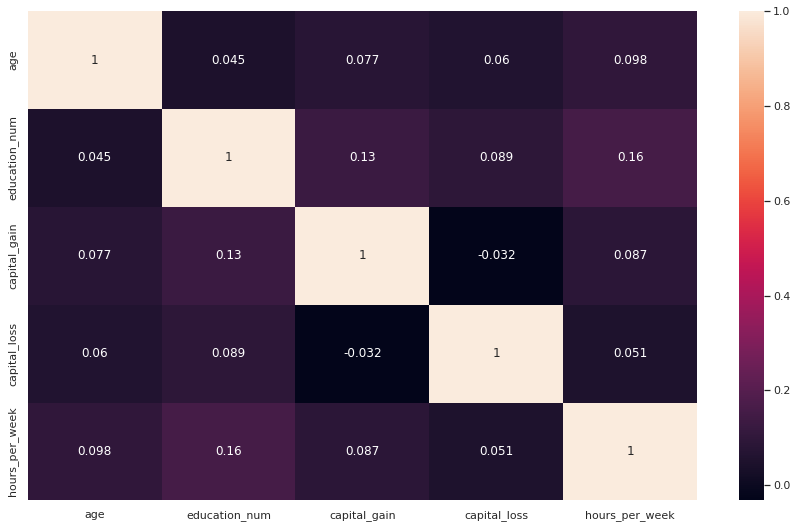

In [44]:
plt.figure(figsize=(15,9))
sns.heatmap(X_train_cor, annot=True)

there's no need to remove any numerical feature, they're not corelated to each other, although we want to remove education feature because we already have the label encoded version in education_num. we also want to remove capital gain and loss, because the outlier has to much influence of the data. and also native country, because it doesnt have a predictor power.

In [45]:
# drop unecessary features
X_train_4 = X_train_3.drop(['education', 'native_country'], axis=1)

# # drop unecessary features
# X_train_4 = X_train_3.drop(['education', 'capital_gain', 'capital_loss', 'native_country'], axis=1)

In [46]:
X_train_4.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
19742,39.0,Private,9.0,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40.0
8352,51.0,Private,11.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,40.0
16239,24.0,Private,9.0,Never-married,Craft-repair,Own-child,White,Male,0,0,40.0
21814,25.0,Private,10.0,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,22.0
11592,50.0,Self-emp-inc,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45.0


### V.VI. Feature scaling

#### V.VI.1 Split numerical and categorical features

In [47]:
# review data types from the dataframe
X_train_4.dtypes

age               float64
workclass          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week    float64
dtype: object

In [48]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_4.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_4.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns :  ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']


In [49]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train_4[num_columns]
X_train_cat = X_train_4[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [50]:
# analyze existing numerical data
X_train_num.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,23175.000000,23175.000000,23175.000000,23175.000000,23175.000000
mean,38.591219,10.177539,1134.377605,88.994563,40.909637
std,12.971728,2.529443,7732.286341,404.339631,11.600585
min,17.000000,2.538545,0.000000,0.000000,4.935264
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,75.500000,16.000000,99999.000000,3900.000000,77.094682


In [51]:
# Define scaler
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [52]:
X_train_num_scaled

array([[0.37606838, 0.47999679, 0.        , 0.        , 0.4859343 ],
       [0.58119658, 0.62856914, 0.        , 0.        , 0.4859343 ],
       [0.11965812, 0.47999679, 0.        , 0.        , 0.4859343 ],
       ...,
       [0.51282051, 0.10856593, 0.        , 0.        , 0.4859343 ],
       [0.32478632, 1.        , 0.        , 0.        , 0.4859343 ],
       [0.54700855, 0.85142766, 0.        , 0.        , 0.15333738]])

### V.VII. Feature Encoding

In [53]:
X_test_cat['occupation'].value_counts()

 Prof-specialty       792
 Exec-managerial      779
 Craft-repair         777
 Adm-clerical         709
 Sales                690
 Other-service        607
 Machine-op-inspct    373
 Transport-moving     305
 Handlers-cleaners    251
 Farming-fishing      186
 Tech-support         176
 Protective-serv      122
 Priv-house-serv       25
 Armed-Forces           1
 ?                      1
Name: occupation, dtype: int64

In [54]:
# encode using one hot encoding
# Creating instance of one_hot encoder
encoder = OneHotEncoder(sparse=False)

# perform one-hot encoding on categorical column
encoder_cat_train = pd.DataFrame(encoder.fit_transform(X_train_cat))
encoder_cat_test = pd.DataFrame(encoder.fit_transform(X_test_cat))

In [55]:
encoder_cat_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23172,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23173,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Merge Feature

In [56]:
# Create dataframe for X numeric features
X_train_num_1 = pd.DataFrame(X_train_num_scaled, columns =[num_columns])
X_test_num_1 = pd.DataFrame(X_test_num_scaled, columns =[num_columns])

In [57]:
X_train_num_1.head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,0.376068,0.479997,0.0,0.0,0.485934
1,0.581197,0.628569,0.0,0.0,0.485934
2,0.119658,0.479997,0.0,0.0,0.485934
3,0.136752,0.554283,0.0,0.0,0.236487
4,0.564103,0.925714,0.0,0.0,0.555225


In [58]:
# Join categorical and numerical features together
X_train_cleaned = X_train_num_1.join(encoder_cat_train)
X_test_cleaned = X_test_num_1.join(encoder_cat_test)

In [59]:
X_train_cleaned.head()

,"(age,)","(education_num,)","(capital_gain,)","(capital_loss,)","(hours_per_week,)",0,1,2,3,4,...,33,34,35,36,37,38,39,40,41,42
0,0.376068,0.479997,0.0,0.0,0.485934,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.581197,0.628569,0.0,0.0,0.485934,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.119658,0.479997,0.0,0.0,0.485934,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.136752,0.554283,0.0,0.0,0.236487,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.564103,0.925714,0.0,0.0,0.555225,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [60]:
X_test_cleaned.head()

,"(age,)","(education_num,)","(capital_gain,)","(capital_loss,)","(hours_per_week,)",0,1,2,3,4,...,33,34,35,36,37,38,39,40,41,42
0,0.564103,0.702855,0.150242,0.000000,0.555225,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.051282,0.554283,0.000000,0.000000,0.485934,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.717949,0.479997,0.000000,0.483846,0.485934,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.581197,0.554283,0.000000,0.000000,0.070188,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.598291,0.479997,0.000000,0.000000,0.347352,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# VI. Model definition

## VI.I. Model definition for logistic regression

we're using logistic regresison as per request. after several trials tuning the hyperparameters, the default non custom settings have the best results.

In [61]:
# Define logistic regression model
log_model = LogisticRegression()

## VI.II. Model definition for SVM

we're using SVM as per request. the hyperparameters that has been chosens are set after some manual trial

In [62]:
# Define SVM
mod_SVM=SVC(kernel='poly',C=15 ,degree=2)

# # Define SVM
# mod_SVM=SVC(kernel='rbf',C=0.7, gamma=0.1 )

# VII. Model training

## VII.I. Model training for logistic regression

In [63]:
# fit model
log_model.fit(X_train_cleaned,y_train)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## VII.II. Model training for SVM

In [64]:
# fit model
mod_SVM.fit(X_train_cleaned,y_train)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


SVC(C=15, degree=2, kernel='poly')

# VIII. Model Evaluation

## VIII.I. Model evaluation for logistic regression

In [65]:
y_pred_train = log_model.predict(X_train_cleaned)
y_pred_test = log_model.predict(X_test_cleaned)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [66]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

accuracy score train :  0.8436677454153182
accuracy score test :  0.8329306178805661


In [67]:
log_model.classes_

array([' <=50K', ' >50K'], dtype=object)

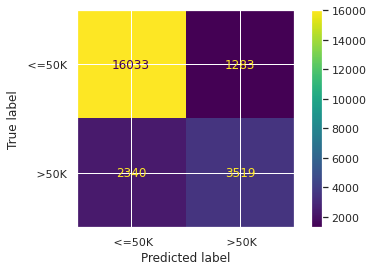

In [68]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [69]:
y_train.value_counts()

 <=50K    17316
 >50K      5859
Name: income_bracket, dtype: int64

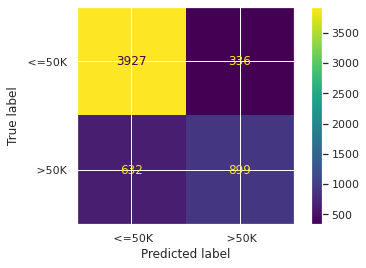

In [70]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [71]:
y_test.value_counts()

 <=50K    4263
 >50K     1531
Name: income_bracket, dtype: int64

In [72]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90     17316
        >50K       0.73      0.60      0.66      5859

    accuracy                           0.84     23175
   macro avg       0.80      0.76      0.78     23175
weighted avg       0.84      0.84      0.84     23175



In [73]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      4263
        >50K       0.73      0.59      0.65      1531

    accuracy                           0.83      5794
   macro avg       0.79      0.75      0.77      5794
weighted avg       0.83      0.83      0.83      5794



#### Model analysis for logistic regression models

From the logistic regression model we've done, the accuracy to predict  people with income lower than \$ 50,000 is quite accurate with f1-score = 0.89, while accuracy to predict more than \$ 50,000 is not, with f1-score = 0.65.

## VIII.II. Model evaluation for SVM

In [74]:
# predict the test set
y_pred_SVM=mod_SVM.predict(X_test_cleaned)

# # predict the test set grid search
# y_pred_SVM=grid.best_estimator_.predict(X_test_cleaned)

/home/sam/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


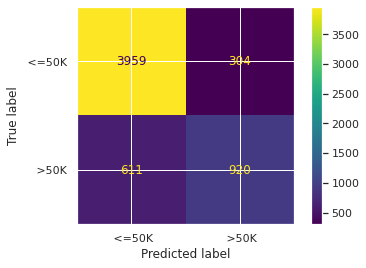

In [75]:
cm = confusion_matrix(y_test, y_pred_SVM, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [76]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4263
        >50K       0.75      0.60      0.67      1531

    accuracy                           0.84      5794
   macro avg       0.81      0.76      0.78      5794
weighted avg       0.84      0.84      0.84      5794



#### Model analysis for SVM model

From the SVM model we've done, the accuracy to predict  people with income lower than \$ 50,000 is quite accurate with f1-score = 0.90, while accuracy to predict more than \$ 50,000 is not, with f1-score = 0.67.

# IX. Model Saving

In [77]:
# save model
with open('log_model.pkl', 'wb') as file_1:
  joblib.dump(log_model, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

with open('mod_SVM.pkl', 'wb') as file_6:
  joblib.dump(mod_SVM, file_6)

# X. Model inference

## X.I. Model inference for logistic regression

In [78]:
# load All files

with open('log_model.pkl', 'rb') as file_1:
  log_model = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)


In [79]:
# display inference-set
data_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
25225,37,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K
19233,30,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
12648,31,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K
9452,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
12535,36,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,39,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1856,41,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K
7656,54,Private,Masters,14,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
9687,48,Local-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,Mexico,>50K


In [80]:
# split between numerical columns and categorical columns
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

data_inf_num

,age,education_num,capital_gain,capital_loss,hours_per_week
25225,37,14,0,0,65
19233,30,9,0,0,40
12648,31,10,0,0,40
9452,32,13,0,0,40
12535,36,10,0,0,40
...,...,...,...,...,...
8255,39,11,0,0,40
1856,41,6,0,0,60
7656,54,14,0,0,40
9687,48,13,0,0,60


In [81]:
# feature sfcaling and feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)

data_inf_num_scaled

array([[0.34188034, 0.85142766, 0.        , 0.        , 0.83238942],
       [0.22222222, 0.47999679, 0.        , 0.        , 0.4859343 ],
       [0.23931624, 0.55428297, 0.        , 0.        , 0.4859343 ],
       ...,
       [0.63247863, 0.85142766, 0.        , 0.        , 0.4859343 ],
       [0.52991453, 0.77714148, 0.        , 0.        , 0.76309839],
       [0.68376068, 0.62856914, 0.        , 0.        , 0.4859343 ]])

In [82]:
# concate numerical columns and categorical columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.34188034, 0.85142766, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.22222222, 0.47999679, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.23931624, 0.55428297, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.63247863, 0.85142766, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.52991453, 0.77714148, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.68376068, 0.62856914, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [83]:
# predict using logistic regression
y_pred_inf = log_model.predict(data_inf_final)
y_pred_inf

array([' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K

In [84]:
# create dataframe of rating pred

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['overall prediction'])
y_pred_inf_df

,overall prediction
0,>50K
1,<=50K
2,<=50K
3,>50K
4,<=50K
...,...
891,<=50K
892,<=50K
893,<=50K
894,>50K


In [85]:
# reset index on data_inf
data_inf.reset_index(drop=True, inplace=True)

In [86]:
# concate between inference

data_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_final

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,overall prediction
0,37,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K,>50K
1,30,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K,<=50K
2,31,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K,<=50K
3,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K,>50K
4,36,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,39,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
892,41,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K,<=50K
893,54,Private,Masters,14,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
894,48,Local-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,Mexico,>50K,>50K


In [87]:
# summarize data final comparison
data_final[['income_bracket', 'overall prediction']]

,income_bracket,overall prediction
0,<=50K,>50K
1,<=50K,<=50K
2,>50K,<=50K
3,<=50K,>50K
4,<=50K,<=50K
...,...,...
891,<=50K,<=50K
892,<=50K,<=50K
893,<=50K,<=50K
894,>50K,>50K


In [88]:
print(classification_report(data_final['income_bracket'] ,data_final['overall prediction']))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90       672
        >50K       0.72      0.61      0.66       224

    accuracy                           0.84       896
   macro avg       0.80      0.76      0.78       896
weighted avg       0.84      0.84      0.84       896



## X.II. Model inference for SVM

In [89]:
# load All files

with open('log_model.pkl', 'rb') as file_6:
  mod_SVM = joblib.load(file_6)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

In [90]:
# split between numerical columns and categorical columns
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

data_inf_num

,age,education_num,capital_gain,capital_loss,hours_per_week
0,37,14,0,0,65
1,30,9,0,0,40
2,31,10,0,0,40
3,32,13,0,0,40
4,36,10,0,0,40
...,...,...,...,...,...
891,39,11,0,0,40
892,41,6,0,0,60
893,54,14,0,0,40
894,48,13,0,0,60


In [91]:
# feature sfcaling and feature encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)

data_inf_num_scaled

array([[0.34188034, 0.85142766, 0.        , 0.        , 0.83238942],
       [0.22222222, 0.47999679, 0.        , 0.        , 0.4859343 ],
       [0.23931624, 0.55428297, 0.        , 0.        , 0.4859343 ],
       ...,
       [0.63247863, 0.85142766, 0.        , 0.        , 0.4859343 ],
       [0.52991453, 0.77714148, 0.        , 0.        , 0.76309839],
       [0.68376068, 0.62856914, 0.        , 0.        , 0.4859343 ]])

In [92]:
# concate numerical columns and categorical columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.34188034, 0.85142766, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.22222222, 0.47999679, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.23931624, 0.55428297, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.63247863, 0.85142766, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.52991453, 0.77714148, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.68376068, 0.62856914, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [93]:
# predict the test set
y_pred_inf_2=mod_SVM.predict(data_inf_final)

In [94]:
y_pred_inf_2

array([' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K',
       ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K',
       ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K',
       ' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K

In [95]:
# create dataframe of rating pred

y_pred_inf_df_2 = pd.DataFrame(y_pred_inf_2, columns=['overall prediction'])
y_pred_inf_df_2

,overall prediction
0,>50K
1,<=50K
2,<=50K
3,>50K
4,<=50K
...,...
891,<=50K
892,<=50K
893,<=50K
894,>50K


In [96]:
# reset index on data_inf
data_inf.reset_index(drop=True, inplace=True)

In [97]:
# concate between inference

data_final_2 = pd.concat([data_inf, y_pred_inf_df_2], axis=1)
data_final_2

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,overall prediction
0,37,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K,>50K
1,30,Private,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K,<=50K
2,31,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K,<=50K
3,32,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K,>50K
4,36,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,39,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
892,41,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K,<=50K
893,54,Private,Masters,14,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K,<=50K
894,48,Local-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,Mexico,>50K,>50K


In [98]:
print(classification_report(data_final_2['income_bracket'] ,data_final_2['overall prediction']))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90       672
        >50K       0.72      0.61      0.66       224

    accuracy                           0.84       896
   macro avg       0.80      0.76      0.78       896
weighted avg       0.84      0.84      0.84       896



# XI. Conclusions

People with income lower than \$ 50,000 is more than thrice the size of people with income higher than \$ 50,000. The percentage of men who earn more than \$ 50,000 is larger than the percentage of women who earn more than \$ 50,000, while the percentage of men who earn less than \$ 50,000 is smaller than the percentage of women who earn less than \$ 50,000.


Asian-pac-islander has the largest percentage of people earning higher than \$ 50,000 , slightly larger than white people. 'Other' race has the highest percentage of people earning lower than \$ 50,000.

Asian-pac-islander is the most educated ethnic group, followed by whites.

From the model we've done, using logistic regression, predicting people with income lower than \$ 50,000 is quite accurate with f1-score = 0.89, while accuracy to predict more than \$ 50,000 is not, with f1-score = 0.65. With SVM, predicting people with income lower than \$ 50,000 is quite accurate with f1-score = 0.90, while accuracy to predict more than \$ 50,000 is not, with f1-score = 0.67.These inaccuracy on income higher than \$ 50,000 probably caused by lack of data. The data for income lower than \$ 50,000 is around 17000 while the data for income higher than \$ 50,000 is only around 5000.